In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from keras.models import Sequential
from keras.layers import InputLayer, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, BatchNormalization
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.constraints import MaxNorm
from keras.callbacks import ModelCheckpoint

import time

In [2]:
filepath = 'C:/Users/ss230/Documents/Study/NSIDC/Edited Data/S_Sea_Ice_Index_Regional_Monthly_Data_G02135_v3.0.xlsx'
Weddell_Extent = pd.read_excel(filepath, sheet_name='Weddell-Extent-km^2')

In [3]:
import sys
sys.path.append('C:/Users/ss230/Documents/Study/NSIDC/SH/Bi_LSTM_Extent/')
import Function as fp

In [4]:
fp.month_mapping(Weddell_Extent)
fp.date_time(Weddell_Extent)

,Extent,Date
0,2136510.859,1979-01-01
1,1243495.891,1979-02-01
2,1699053.449,1979-03-01
3,2617442.085,1979-04-01
4,3852934.206,1979-05-01
...,...,...
533,3668127.143,2023-06-01
534,4805519.784,2023-07-01
535,5524445.234,2023-08-01
536,6006669.861,2023-09-01


In [5]:
scaler = MinMaxScaler()
Weddell_Extent['Extent'] = scaler.fit_transform(Weddell_Extent['Extent'].values.reshape(-1, 1))

In [6]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    lead_time = 2
    for i in range(len(df_as_np) - window_size - lead_time + 1):
        window_data = df_as_np[i:i+window_size]
        row = [[a] for a in window_data]
        X.append(row)
        label = df_as_np[i+window_size+lead_time-1]
        y.append(label)
    return np.array(X), np.array(y)

In [7]:
extent = Weddell_Extent['Extent']
W_S=12
X,y = df_to_X_y(extent, W_S)
X.shape, y.shape

((525, 12, 1), (525,))

In [8]:
X_train, y_train = X[:420], y[:420]
X_val, y_val = X[420:472], y[420:472]
X_test, y_test = X[472:], y[472:]

In [9]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(W_S, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(32, kernel_constraint=MaxNorm(1.0), activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))

In [10]:
cp = ModelCheckpoint('Weddell_model_LT2/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(0.0001), metrics=[RootMeanSquaredError()])

In [11]:
stime = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=8, callbacks=[cp])
etime = time.time()

Epoch 1/50
47/53 [=========================>....] - ETA: 0s - loss: 0.2772 - root_mean_squared_error: 0.5265

INFO:tensorflow:Assets written to: Weddell_model_LT2\assets


INFO:tensorflow:Assets written to: Weddell_model_LT2\assets


53/53 [==============================] - 7s 81ms/step - loss: 0.2738 - root_mean_squared_error: 0.5233 - val_loss: 0.2958 - val_root_mean_squared_error: 0.5439
Epoch 2/50
47/53 [=========================>....] - ETA: 0s - loss: 0.2272 - root_mean_squared_error: 0.4767

INFO:tensorflow:Assets written to: Weddell_model_LT2\assets


INFO:tensorflow:Assets written to: Weddell_model_LT2\assets


53/53 [==============================] - 4s 68ms/step - loss: 0.2250 - root_mean_squared_error: 0.4743 - val_loss: 0.2385 - val_root_mean_squared_error: 0.4884
Epoch 3/50
53/53 [==============================] - ETA: 0s - loss: 0.1885 - root_mean_squared_error: 0.4341

INFO:tensorflow:Assets written to: Weddell_model_LT2\assets


INFO:tensorflow:Assets written to: Weddell_model_LT2\assets


53/53 [==============================] - 3s 67ms/step - loss: 0.1885 - root_mean_squared_error: 0.4341 - val_loss: 0.1917 - val_root_mean_squared_error: 0.4378
Epoch 4/50
41/53 [======================>.......] - ETA: 0s - loss: 0.1573 - root_mean_squared_error: 0.3967

INFO:tensorflow:Assets written to: Weddell_model_LT2\assets


INFO:tensorflow:Assets written to: Weddell_model_LT2\assets


53/53 [==============================] - 4s 74ms/step - loss: 0.1511 - root_mean_squared_error: 0.3887 - val_loss: 0.1541 - val_root_mean_squared_error: 0.3926
Epoch 5/50
52/53 [============================>.] - ETA: 0s - loss: 0.1244 - root_mean_squared_error: 0.3527

INFO:tensorflow:Assets written to: Weddell_model_LT2\assets


INFO:tensorflow:Assets written to: Weddell_model_LT2\assets


53/53 [==============================] - 3s 62ms/step - loss: 0.1236 - root_mean_squared_error: 0.3516 - val_loss: 0.1254 - val_root_mean_squared_error: 0.3541
Epoch 6/50
43/53 [=======================>......] - ETA: 0s - loss: 0.1061 - root_mean_squared_error: 0.3258

INFO:tensorflow:Assets written to: Weddell_model_LT2\assets


INFO:tensorflow:Assets written to: Weddell_model_LT2\assets


53/53 [==============================] - 3s 65ms/step - loss: 0.1014 - root_mean_squared_error: 0.3185 - val_loss: 0.0988 - val_root_mean_squared_error: 0.3144
Epoch 7/50
44/53 [=======================>......] - ETA: 0s - loss: 0.0778 - root_mean_squared_error: 0.2790

INFO:tensorflow:Assets written to: Weddell_model_LT2\assets


INFO:tensorflow:Assets written to: Weddell_model_LT2\assets


53/53 [==============================] - 4s 78ms/step - loss: 0.0767 - root_mean_squared_error: 0.2769 - val_loss: 0.0770 - val_root_mean_squared_error: 0.2776
Epoch 8/50
42/53 [======================>.......] - ETA: 0s - loss: 0.0640 - root_mean_squared_error: 0.2529

INFO:tensorflow:Assets written to: Weddell_model_LT2\assets


INFO:tensorflow:Assets written to: Weddell_model_LT2\assets


53/53 [==============================] - 4s 69ms/step - loss: 0.0588 - root_mean_squared_error: 0.2424 - val_loss: 0.0595 - val_root_mean_squared_error: 0.2440
Epoch 9/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0473 - root_mean_squared_error: 0.2175

INFO:tensorflow:Assets written to: Weddell_model_LT2\assets


INFO:tensorflow:Assets written to: Weddell_model_LT2\assets


53/53 [==============================] - 4s 70ms/step - loss: 0.0463 - root_mean_squared_error: 0.2151 - val_loss: 0.0446 - val_root_mean_squared_error: 0.2113
Epoch 10/50
49/53 [==========================>...] - ETA: 0s - loss: 0.0331 - root_mean_squared_error: 0.1819

INFO:tensorflow:Assets written to: Weddell_model_LT2\assets


INFO:tensorflow:Assets written to: Weddell_model_LT2\assets


53/53 [==============================] - 4s 75ms/step - loss: 0.0326 - root_mean_squared_error: 0.1805 - val_loss: 0.0332 - val_root_mean_squared_error: 0.1822
Epoch 11/50
52/53 [============================>.] - ETA: 0s - loss: 0.0245 - root_mean_squared_error: 0.1566

INFO:tensorflow:Assets written to: Weddell_model_LT2\assets


INFO:tensorflow:Assets written to: Weddell_model_LT2\assets


53/53 [==============================] - 3s 63ms/step - loss: 0.0244 - root_mean_squared_error: 0.1563 - val_loss: 0.0253 - val_root_mean_squared_error: 0.1592
Epoch 12/50
45/53 [========================>.....] - ETA: 0s - loss: 0.0239 - root_mean_squared_error: 0.1547

INFO:tensorflow:Assets written to: Weddell_model_LT2\assets


INFO:tensorflow:Assets written to: Weddell_model_LT2\assets


53/53 [==============================] - 4s 72ms/step - loss: 0.0233 - root_mean_squared_error: 0.1528 - val_loss: 0.0161 - val_root_mean_squared_error: 0.1267
Epoch 13/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0182 - root_mean_squared_error: 0.1350

INFO:tensorflow:Assets written to: Weddell_model_LT2\assets


INFO:tensorflow:Assets written to: Weddell_model_LT2\assets


53/53 [==============================] - 4s 73ms/step - loss: 0.0180 - root_mean_squared_error: 0.1343 - val_loss: 0.0140 - val_root_mean_squared_error: 0.1183
Epoch 14/50
53/53 [==============================] - ETA: 0s - loss: 0.0166 - root_mean_squared_error: 0.1289

INFO:tensorflow:Assets written to: Weddell_model_LT2\assets


INFO:tensorflow:Assets written to: Weddell_model_LT2\assets


53/53 [==============================] - 4s 74ms/step - loss: 0.0166 - root_mean_squared_error: 0.1289 - val_loss: 0.0077 - val_root_mean_squared_error: 0.0877
Epoch 15/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0143 - root_mean_squared_error: 0.1198 - val_loss: 0.0101 - val_root_mean_squared_error: 0.1004
Epoch 16/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0151 - root_mean_squared_error: 0.1231 - val_loss: 0.0093 - val_root_mean_squared_error: 0.0962
Epoch 17/50
45/53 [========================>.....] - ETA: 0s - loss: 0.0118 - root_mean_squared_error: 0.1085

INFO:tensorflow:Assets written to: Weddell_model_LT2\assets


INFO:tensorflow:Assets written to: Weddell_model_LT2\assets


53/53 [==============================] - 4s 75ms/step - loss: 0.0123 - root_mean_squared_error: 0.1107 - val_loss: 0.0065 - val_root_mean_squared_error: 0.0808
Epoch 18/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0135 - root_mean_squared_error: 0.1162 - val_loss: 0.0075 - val_root_mean_squared_error: 0.0867
Epoch 19/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0158 - root_mean_squared_error: 0.1257

INFO:tensorflow:Assets written to: Weddell_model_LT2\assets


INFO:tensorflow:Assets written to: Weddell_model_LT2\assets


53/53 [==============================] - 4s 78ms/step - loss: 0.0159 - root_mean_squared_error: 0.1259 - val_loss: 0.0063 - val_root_mean_squared_error: 0.0796
Epoch 20/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0162 - root_mean_squared_error: 0.1273

INFO:tensorflow:Assets written to: Weddell_model_LT2\assets


INFO:tensorflow:Assets written to: Weddell_model_LT2\assets


53/53 [==============================] - 3s 63ms/step - loss: 0.0158 - root_mean_squared_error: 0.1258 - val_loss: 0.0036 - val_root_mean_squared_error: 0.0598
Epoch 21/50
52/53 [============================>.] - ETA: 0s - loss: 0.0108 - root_mean_squared_error: 0.1041

INFO:tensorflow:Assets written to: Weddell_model_LT2\assets


INFO:tensorflow:Assets written to: Weddell_model_LT2\assets


53/53 [==============================] - 4s 77ms/step - loss: 0.0108 - root_mean_squared_error: 0.1039 - val_loss: 0.0035 - val_root_mean_squared_error: 0.0593
Epoch 22/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0116 - root_mean_squared_error: 0.1078 - val_loss: 0.0037 - val_root_mean_squared_error: 0.0608
Epoch 23/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0140 - root_mean_squared_error: 0.1182 - val_loss: 0.0072 - val_root_mean_squared_error: 0.0847
Epoch 24/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0115 - root_mean_squared_error: 0.1072 - val_loss: 0.0065 - val_root_mean_squared_error: 0.0807
Epoch 25/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0171 - root_mean_squared_error: 0.1306 - val_loss: 0.0047 - val_root_mean_squared_error: 0.0683
Epoch 26/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0150 - root_mean_squared_error: 0.1227 - val_loss: 0.0039 - val_root_mean_squared

INFO:tensorflow:Assets written to: Weddell_model_LT2\assets


INFO:tensorflow:Assets written to: Weddell_model_LT2\assets


53/53 [==============================] - 4s 69ms/step - loss: 0.0154 - root_mean_squared_error: 0.1240 - val_loss: 0.0033 - val_root_mean_squared_error: 0.0578
Epoch 28/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0106 - root_mean_squared_error: 0.1029 - val_loss: 0.0041 - val_root_mean_squared_error: 0.0640
Epoch 29/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0156 - root_mean_squared_error: 0.1247 - val_loss: 0.0036 - val_root_mean_squared_error: 0.0603
Epoch 30/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0121 - root_mean_squared_error: 0.1100 - val_loss: 0.0039 - val_root_mean_squared_error: 0.0625
Epoch 31/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0122 - root_mean_squared_error: 0.1104 - val_loss: 0.0067 - val_root_mean_squared_error: 0.0820
Epoch 32/50
48/53 [==========================>...] - ETA: 0s - loss: 0.0133 - root_mean_squared_error: 0.1153

INFO:tensorflow:Assets written to: Weddell_model_LT2\assets


INFO:tensorflow:Assets written to: Weddell_model_LT2\assets


53/53 [==============================] - 3s 63ms/step - loss: 0.0134 - root_mean_squared_error: 0.1159 - val_loss: 0.0032 - val_root_mean_squared_error: 0.0569
Epoch 33/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0112 - root_mean_squared_error: 0.1060 - val_loss: 0.0084 - val_root_mean_squared_error: 0.0917
Epoch 34/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0150 - root_mean_squared_error: 0.1226 - val_loss: 0.0039 - val_root_mean_squared_error: 0.0626
Epoch 35/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0120 - root_mean_squared_error: 0.1095 - val_loss: 0.0045 - val_root_mean_squared_error: 0.0668
Epoch 36/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0118 - root_mean_squared_error: 0.1088 - val_loss: 0.0079 - val_root_mean_squared_error: 0.0891
Epoch 37/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0147 - root_mean_squared_error: 0.1212 - val_loss: 0.0076 - val_root_mean_squared

INFO:tensorflow:Assets written to: Weddell_model_LT2\assets


INFO:tensorflow:Assets written to: Weddell_model_LT2\assets


53/53 [==============================] - 4s 79ms/step - loss: 0.0137 - root_mean_squared_error: 0.1172 - val_loss: 0.0031 - val_root_mean_squared_error: 0.0559
Epoch 39/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0123 - root_mean_squared_error: 0.1108 - val_loss: 0.0047 - val_root_mean_squared_error: 0.0688
Epoch 40/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0128 - root_mean_squared_error: 0.1133 - val_loss: 0.0081 - val_root_mean_squared_error: 0.0902
Epoch 41/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0147 - root_mean_squared_error: 0.1211 - val_loss: 0.0090 - val_root_mean_squared_error: 0.0949
Epoch 42/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0110 - root_mean_squared_error: 0.1050 - val_loss: 0.0050 - val_root_mean_squared_error: 0.0705
Epoch 43/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0098 - root_mean_squared_error: 0.0990

INFO:tensorflow:Assets written to: Weddell_model_LT2\assets


INFO:tensorflow:Assets written to: Weddell_model_LT2\assets


53/53 [==============================] - 4s 72ms/step - loss: 0.0097 - root_mean_squared_error: 0.0986 - val_loss: 0.0031 - val_root_mean_squared_error: 0.0556
Epoch 44/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0164 - root_mean_squared_error: 0.1282 - val_loss: 0.0100 - val_root_mean_squared_error: 0.1000
Epoch 45/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0084 - root_mean_squared_error: 0.0915

INFO:tensorflow:Assets written to: Weddell_model_LT2\assets


INFO:tensorflow:Assets written to: Weddell_model_LT2\assets


53/53 [==============================] - 4s 76ms/step - loss: 0.0095 - root_mean_squared_error: 0.0975 - val_loss: 0.0031 - val_root_mean_squared_error: 0.0554
Epoch 46/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0141 - root_mean_squared_error: 0.1187 - val_loss: 0.0047 - val_root_mean_squared_error: 0.0686
Epoch 47/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0122 - root_mean_squared_error: 0.1106 - val_loss: 0.0041 - val_root_mean_squared_error: 0.0641
Epoch 48/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0120 - root_mean_squared_error: 0.1098 - val_loss: 0.0040 - val_root_mean_squared_error: 0.0631
Epoch 49/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0127 - root_mean_squared_error: 0.1129 - val_loss: 0.0049 - val_root_mean_squared_error: 0.0699
Epoch 50/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0136 - root_mean_squared_error: 0.1165 - val_loss: 0.0032 - val_root_mean_squared

In [12]:
time = (etime - stime)/60
print(f'{time} minutes')

1.6204179922739665 minutes


In [13]:
loss = history.history['loss']
epochs = list(range(1, len(loss) + 1))

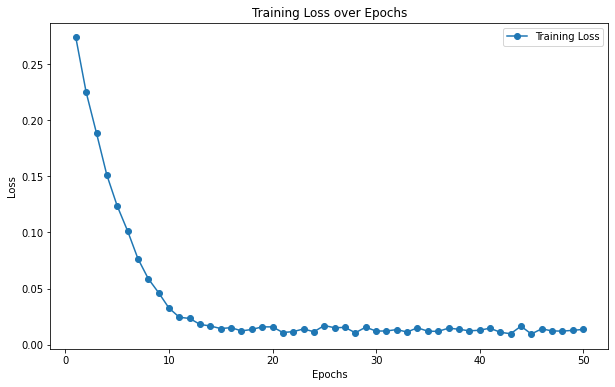

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss', marker='o', linestyle='-')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

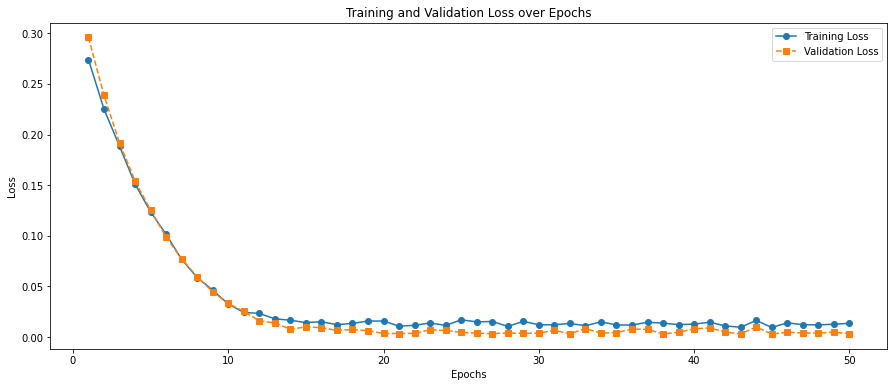

In [15]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(15,6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o', linestyle='-')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='s', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

In [16]:
from tensorflow.keras.models import load_model
model1 = load_model('Weddell_model_LT2/')

In [17]:
test_predictions = model1.predict(X_test)

2/2 [==============================] - 0s 0s/step


In [18]:
mse = mean_squared_error(y_test, test_predictions)
print('RMSE :', np.sqrt(mse))

mae = mean_absolute_error(y_test, test_predictions)
print('MAE :', mae)

RMSE : 0.04657986814539997
MAE : 0.038529382861127295


In [19]:
test_predictions = scaler.inverse_transform(test_predictions)
test_original = scaler.inverse_transform(y_test.reshape(-1,1))

In [20]:
train_results = pd.DataFrame(data={'Train Predictions': test_predictions.flatten(), 'Actual Extent': test_original.flatten()})
train_results

,Train Predictions,Actual Extent
0,4286326.500,4544849.638
1,5330814.500,5882741.038
2,6146879.000,6574288.749
3,6653826.000,6669726.076
4,6523414.000,6516136.854
5,5531382.000,5902163.675
6,3746344.750,3498103.449
7,1711024.125,1633675.726
8,935211.500,1292668.399
9,1338595.875,1527666.815


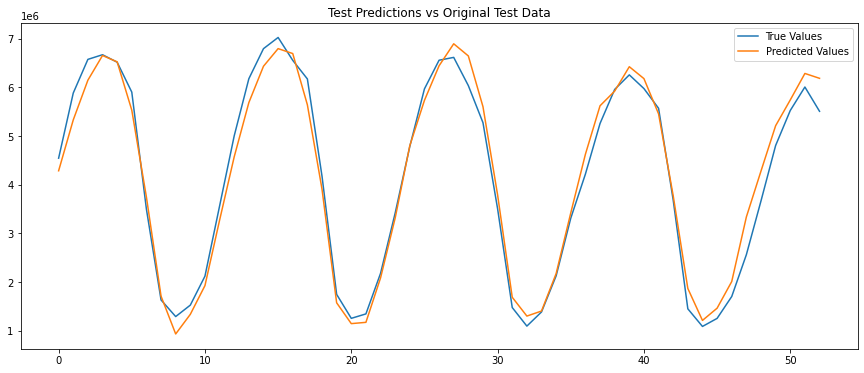

In [21]:
plt.figure(figsize=(15,6))
plt.plot(test_original, label='True Values')
plt.plot(test_predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()

In [22]:
predictions = model1.predict(X)

17/17 [==============================] - 0s 2ms/step


In [23]:
predictions = scaler.inverse_transform(predictions)
Original = scaler.inverse_transform(y.reshape(-1,1))

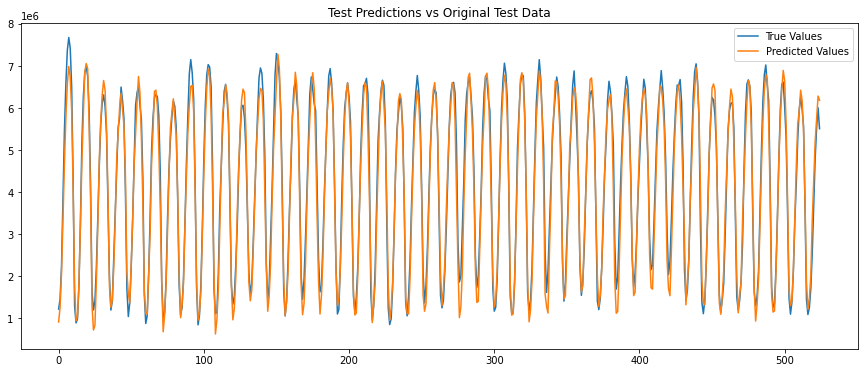

In [24]:
plt.figure(figsize=(15,6))
plt.plot(Original, label='True Values')
plt.plot(predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()